___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.drop("CustomerID", axis=1, inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [7]:
df.rename(columns={"Annual Income (k$)" : "Income_k$", "Spending Score (1-100)": "Spending_Score"}, inplace=True)

In [8]:
df.columns

Index(['Gender', 'Age', 'Income_k$', 'Spending_Score'], dtype='object')

In [9]:
df.head()

,Gender,Age,Income_k$,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.isnull().sum()

Gender            0
Age               0
Income_k$         0
Spending_Score    0
dtype: int64

In [11]:
df.duplicated().sum()

0

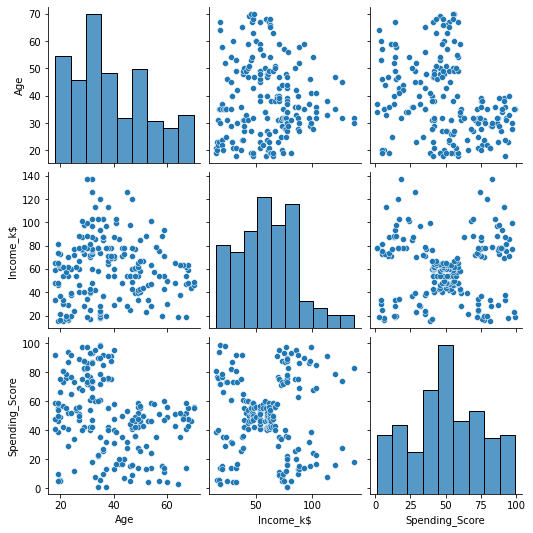

In [12]:
sns.pairplot(df);

In [13]:
df.corr()

,Age,Income_k$,Spending_Score
Age,1.000000,-0.012398,-0.327227
Income_k$,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


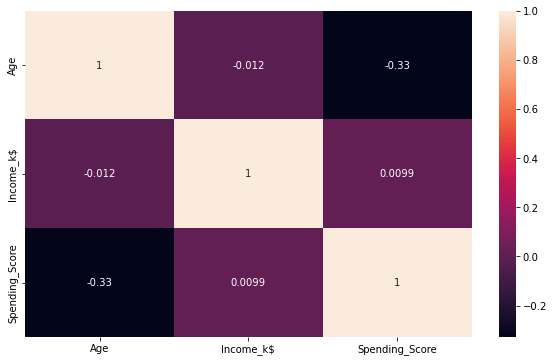

In [14]:
sns.heatmap(df.corr(), annot=True);

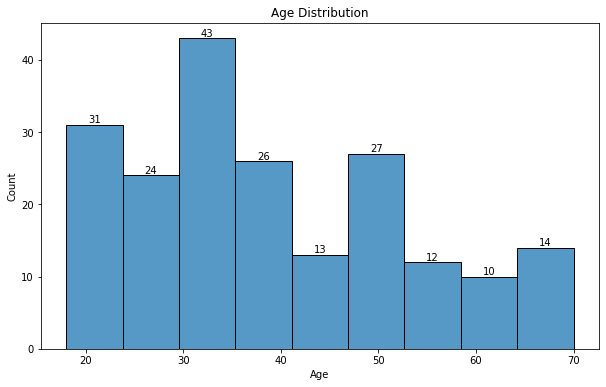

In [23]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x =df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

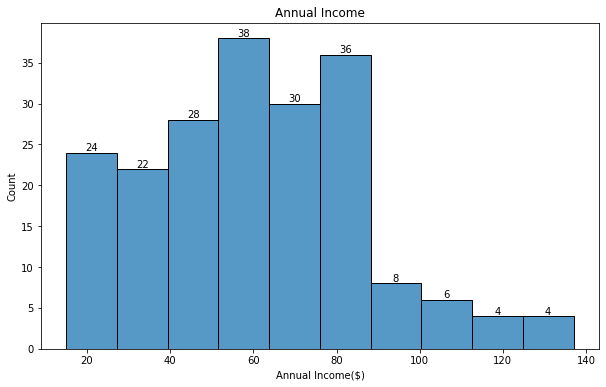

In [24]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x='Income_k$', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);

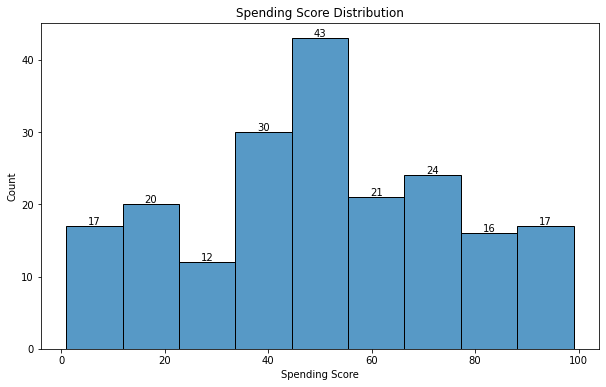

In [25]:
plt.figure(figsize=(10,6))
ax = sns.histplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

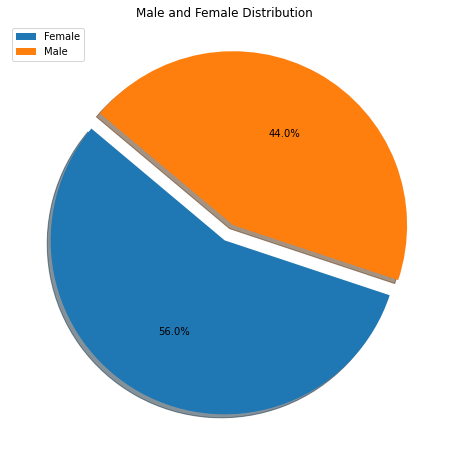

In [27]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

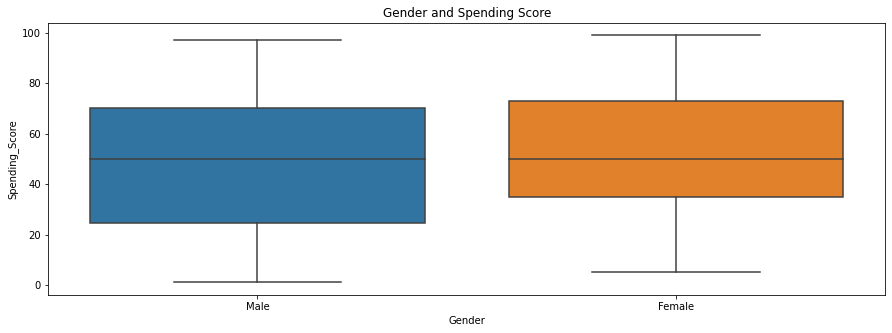

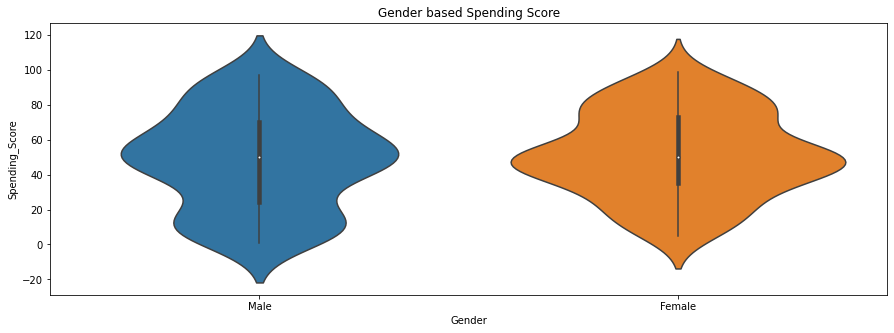

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score', data=df)
plt.title('Gender based Spending Score')
plt.show()


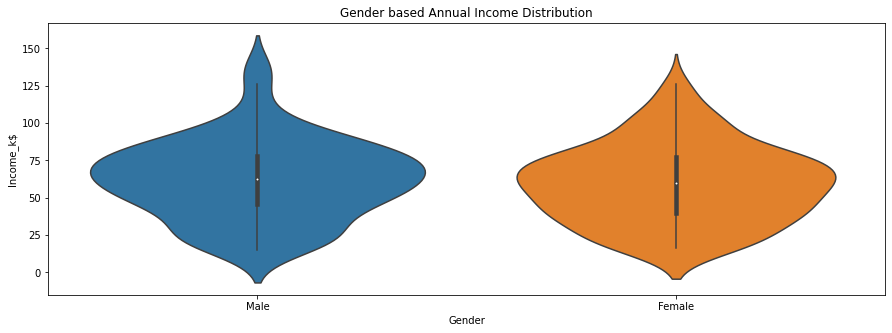

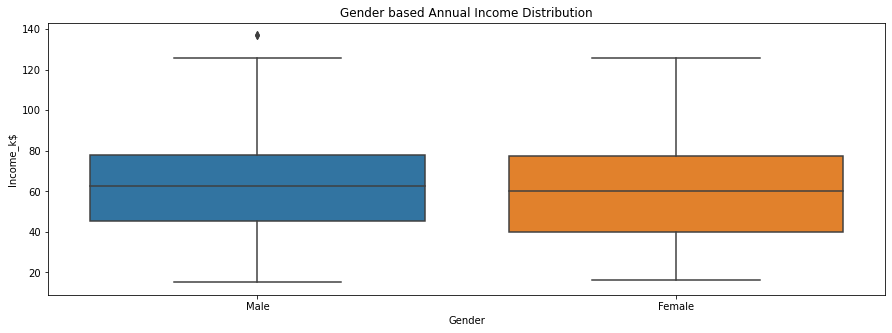

In [32]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Income_k$', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Income_k$', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

---
---

## 3. Cluster Analysis

In [105]:
from sklearn.cluster import KMeans

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [106]:
X = df[["Age", "Spending_Score"]]
X.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### Hopkins test

In [107]:
from pyclustertend import hopkins

In [108]:
X.shape

(200, 2)

In [109]:
hopkins(X, X.shape[0])

0.2917686437599186

#### *ii. Determine optimal number of clusters*

In [110]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [111]:
ssd = pd.DataFrame(ssd, index=range(2,10))

In [112]:
ssd

,0
2,75949.156010
3,45840.676616
4,28165.583567
5,23810.462233
6,19678.461462
7,15523.684014
8,13006.483629
9,11437.653143


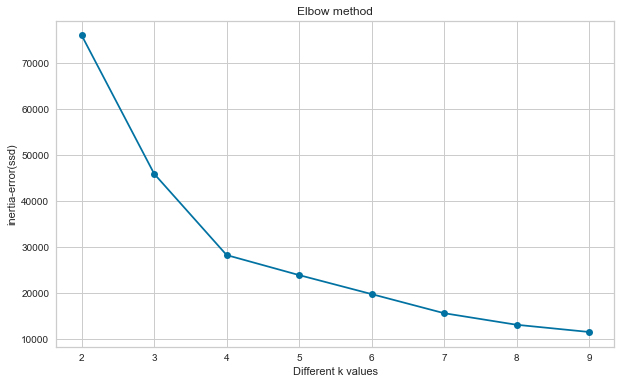

In [113]:
plt.plot(ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error(ssd)")
plt.title("Elbow method");



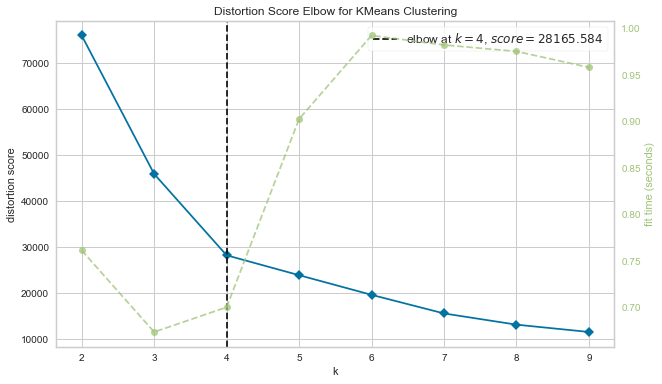

In [114]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.poof();

In [115]:
from sklearn.metrics import silhouette_score

In [116]:
K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    silhouette_avg = silhouette_score(X, model.labels_)
    print(f" For cluster = {k}, Silhouette score is {silhouette_avg}")

 For cluster = 2, Silhouette score is 0.4692341232501655
 For cluster = 3, Silhouette score is 0.45300127016521263
 For cluster = 4, Silhouette score is 0.49973941540141753
 For cluster = 5, Silhouette score is 0.4306742923520043
 For cluster = 6, Silhouette score is 0.4282564003324285
 For cluster = 7, Silhouette score is 0.42313509747504796
 For cluster = 8, Silhouette score is 0.4314306043056888
 For cluster = 9, Silhouette score is 0.41671999499926166


#### *iii. Apply K Means*

In [117]:
k_means_model = KMeans(n_clusters=4)
k_means_model.fit_predict(X)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [118]:
k_means_model.inertia_

28165.583566629342

#### *iv. Visualizing and Labeling All the Clusters*

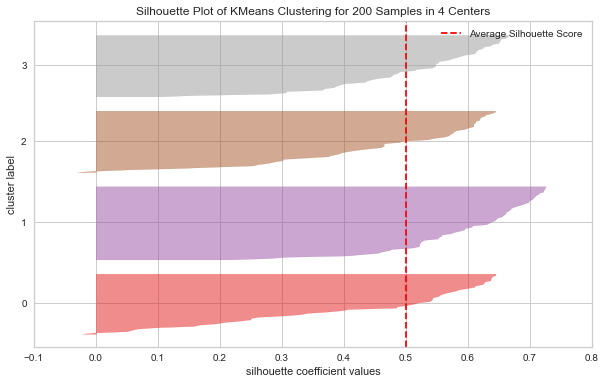

In [119]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(k_means_model)
visualizer.fit(X)
visualizer.poof();

In [120]:
cluster_labels = k_means_model.labels_

In [121]:
X["clusters"] = cluster_labels

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

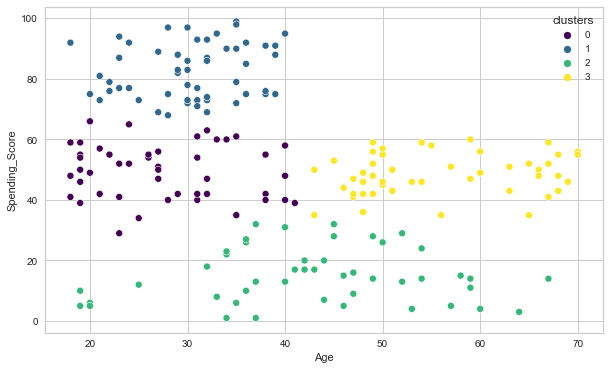

In [122]:
sns.scatterplot(x=X.Age, y=X.Spending_Score, hue=X.clusters, palette="viridis")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [123]:
X = df.copy()

In [124]:
X = X.iloc[:, 2:4]

In [125]:
X.head()

,Income_k$,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Hopkins test

In [126]:
X.shape

(200, 2)

In [127]:
hopkins(X, X.shape[0])

0.3050861781274216

#### *ii. Determine optimal number of clusters*

In [128]:
ssd = []
K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [129]:
ssd = pd.DataFrame(ssd, index=range(2,10))
ssd

,0
2,181363.595960
3,106348.373062
4,73679.789039
5,44448.455448
6,37442.247450
7,30273.394312
8,24995.969781
9,21826.936303


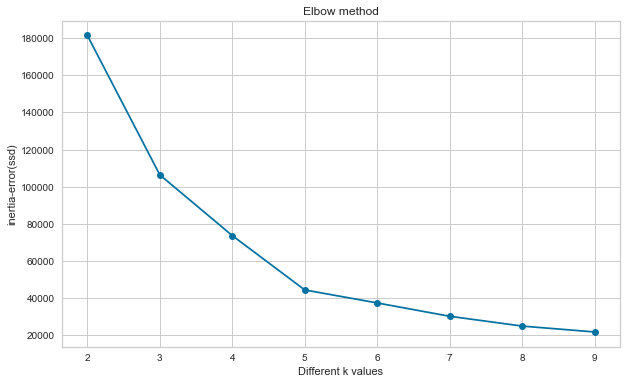

In [130]:
plt.plot(ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error(ssd)")
plt.title("Elbow method");



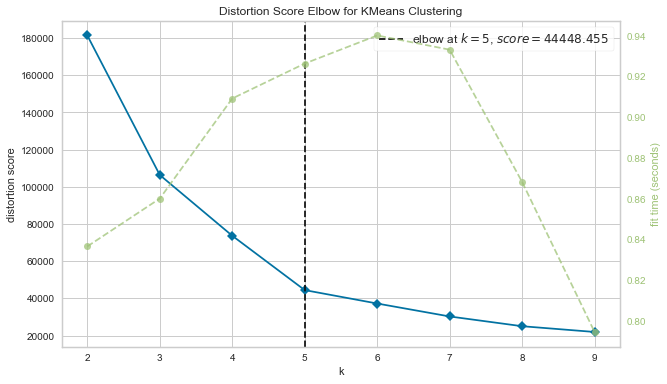

In [131]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.poof();

In [132]:
K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    silhouette_avg = silhouette_score(X, model.labels_)
    print(f" For cluster = {k}, Silhouette score is {silhouette_avg}")

 For cluster = 2, Silhouette score is 0.2968969162503008
 For cluster = 3, Silhouette score is 0.46761358158775435
 For cluster = 4, Silhouette score is 0.4931963109249047
 For cluster = 5, Silhouette score is 0.553931997444648
 For cluster = 6, Silhouette score is 0.53976103063432
 For cluster = 7, Silhouette score is 0.45325636265533253
 For cluster = 8, Silhouette score is 0.45827056882053113
 For cluster = 9, Silhouette score is 0.45841513839373804


#### *iii. Apply K Means*

In [133]:
k_means_model = KMeans(n_clusters=5)
k_means_model.fit_predict(X)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [134]:
# or
k_means_model.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [135]:
k_means_model.inertia_

44448.45544793371

#### *iv. Visualizing and Labeling All the Clusters*

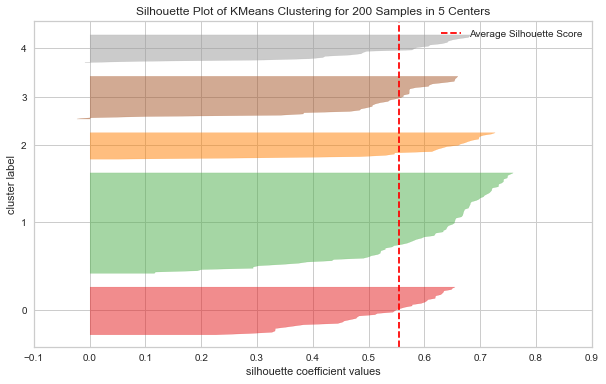

In [136]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(k_means_model)
visualizer.fit(X)
visualizer.poof();

#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='Income_k$', ylabel='Spending_Score'>

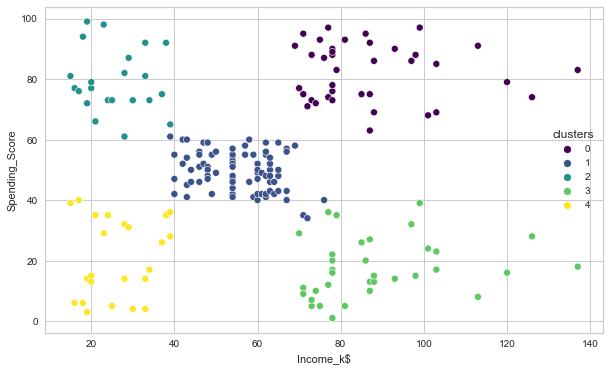

In [137]:
cluster_labels = k_means_model.labels_

X["clusters"] = cluster_labels

sns.scatterplot(x=X["Income_k$"], y=X.Spending_Score, hue=X.clusters, palette="viridis")

(<AxesSubplot:xlabel='Income_k$', ylabel='Spending_Score'>,)

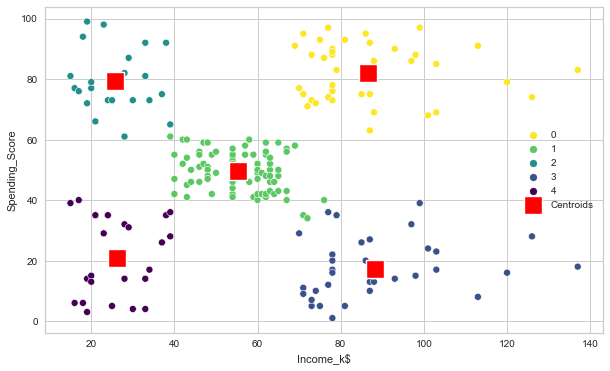

In [140]:
sns.scatterplot(x= X["Income_k$"], y= X["Spending_Score"], hue=X.clusters,palette="viridis_r")
sns.scatterplot(k_means_model.cluster_centers_[:, 0], k_means_model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',');

### Hierarchical Clustering

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [142]:
X = df.copy()

In [143]:
X.Gender = X.Gender.map({"Male": 1, "Female":0})

In [144]:
X.head()

,Gender,Age,Income_k$,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### *i. Determine optimal number of clusters using Dendogram*

In [145]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(y=X, method="complete")
hc_average = linkage(y=X, method="average")
hc_single = linkage(y=X, method="single")

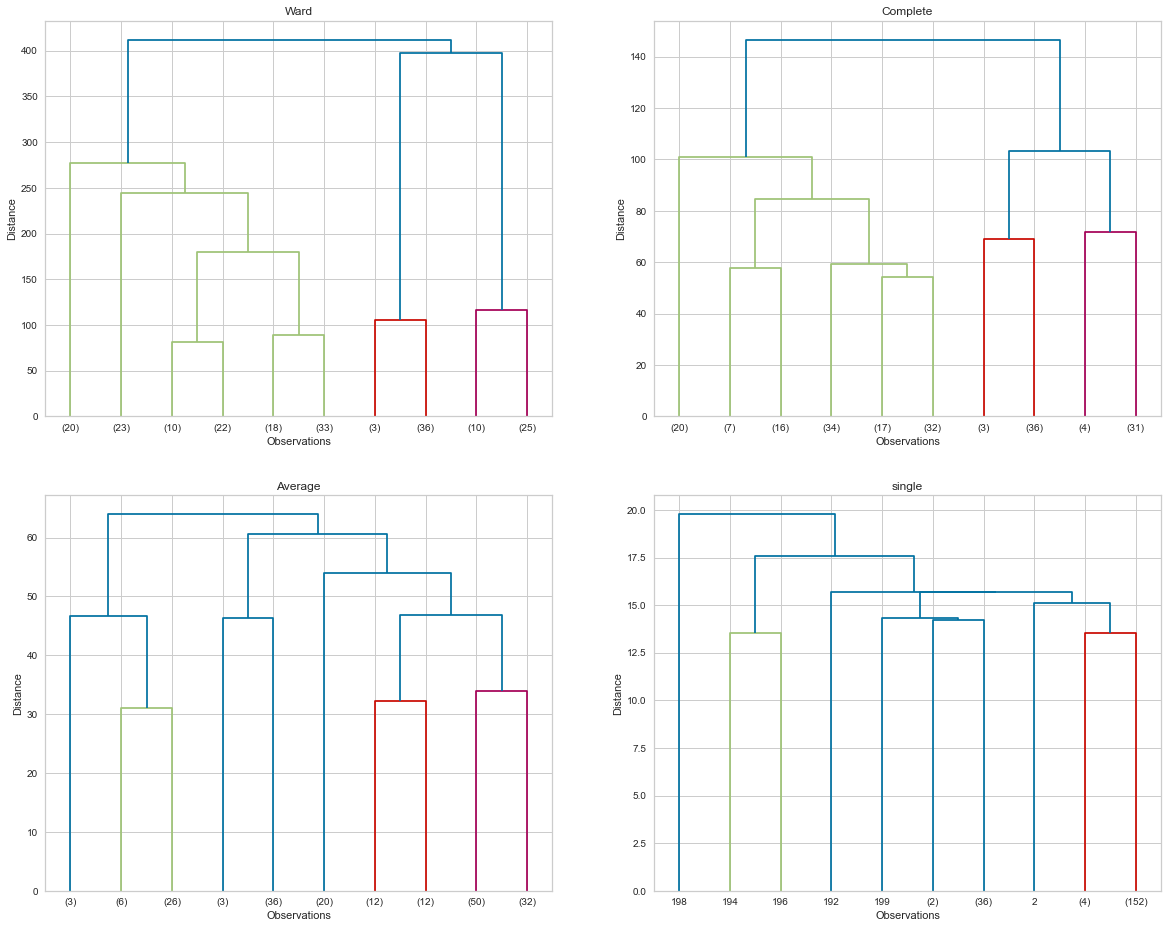

In [146]:
plt.figure(figsize=(20, 16))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(224)
plt.title("single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10, leaf_font_size=10);

### Clustering based on Age and Spending Score- x1

In [157]:
X1 = df[["Age", "Spending_Score"]]

In [158]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(y=X1, method="complete")
hc_average = linkage(y=X1, method="average")
hc_single = linkage(y=X1, method="single")

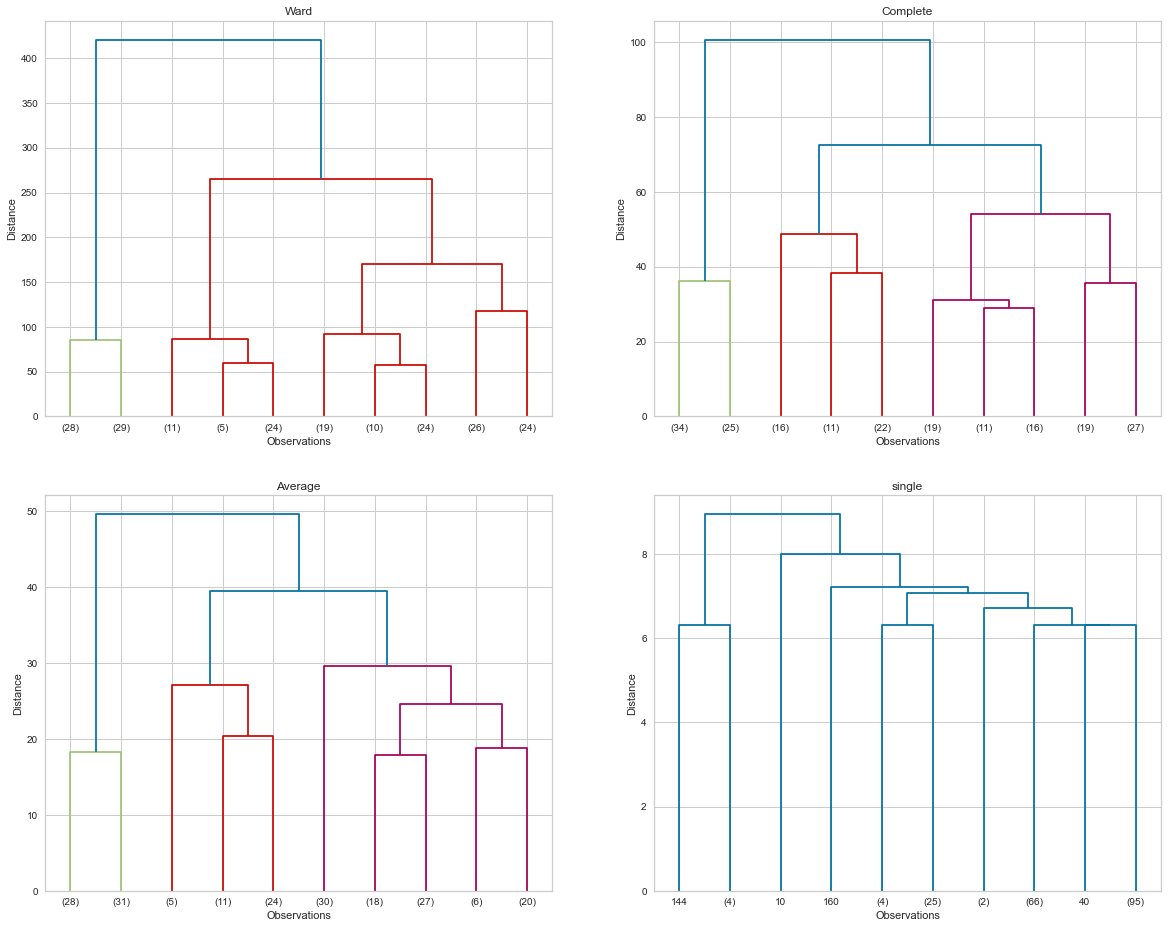

In [159]:
plt.figure(figsize=(20, 16))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(224)
plt.title("single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10, leaf_font_size=10);

In [160]:
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


### Clustering based on Annual Income and Spending Score- x2

In [161]:
X2 = df[["Income_k$", "Spending_Score"]]

In [162]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(y=X2, method="complete")
hc_average = linkage(y=X2, method="average")
hc_single = linkage(y=X2, method="single")

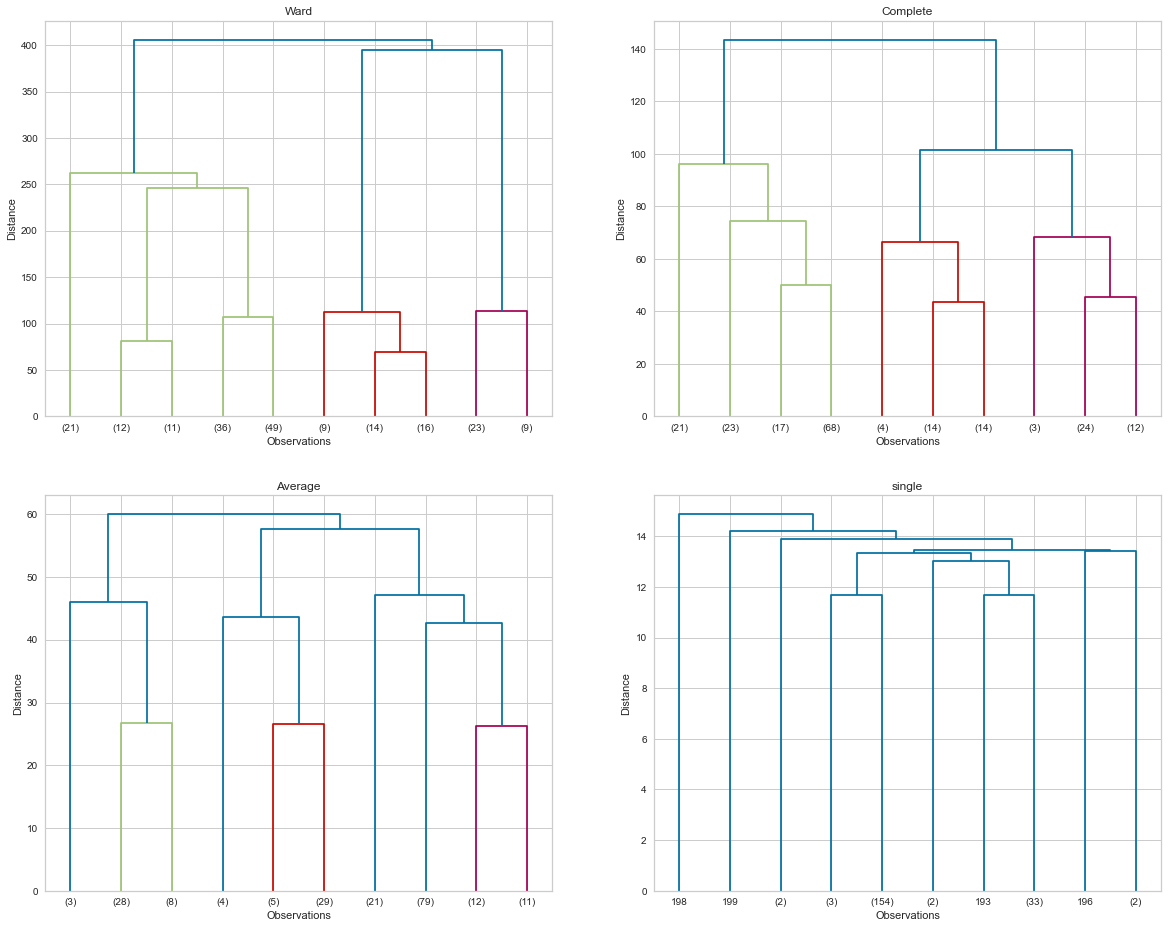

In [163]:
plt.figure(figsize=(20, 16))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10, leaf_font_size=10)

plt.subplot(224)
plt.title("single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10, leaf_font_size=10);

In [164]:
from sklearn.metrics import silhouette_score

In [165]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

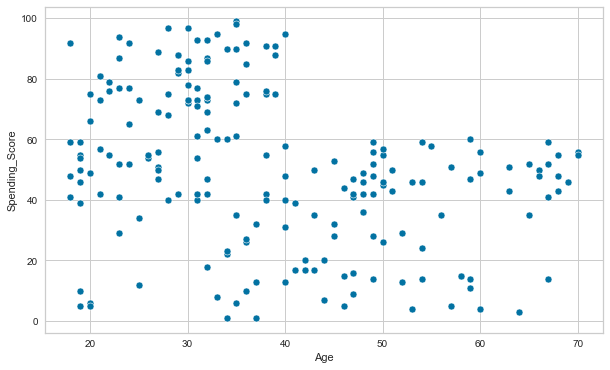

In [176]:
sns.scatterplot(x=X1["Age"], y=X1["Spending_Score"]);

In [177]:
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [178]:
model = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
model.fit_predict(X1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [179]:
K = range(2,10)
for k in K:
    model1 = KMeans(n_clusters=k)
    model1.fit(X1)
    cluster_labels = model1.labels_
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.4994683048348817
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.4405479018621985
For n_clusters=7, the silhouette score is 0.41185574200196606
For n_clusters=8, the silhouette score is 0.4305548672407991
For n_clusters=9, the silhouette score is 0.41373183175222694


In [181]:
X1_clusters = model.labels_
X1["clusters"] = X1_clusters

#### Visualizing Cluster for Age and Spending Score- x1

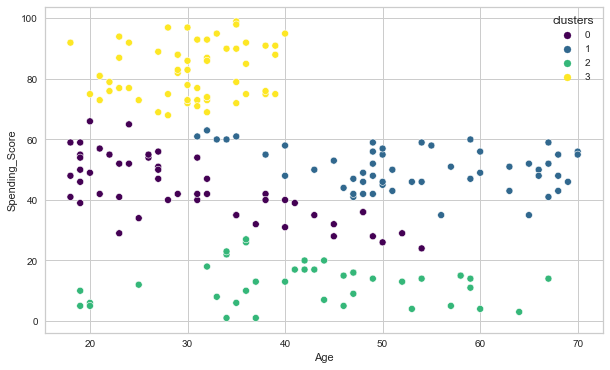

In [184]:
sns.scatterplot(x=X1["Age"], y=X1["Spending_Score"], hue=X1.clusters, palette="viridis");


In [197]:
X1.clusters.value_counts()

3    57
1    53
0    50
2    40
Name: clusters, dtype: int64

#### Annual Income and Spending Score- x2

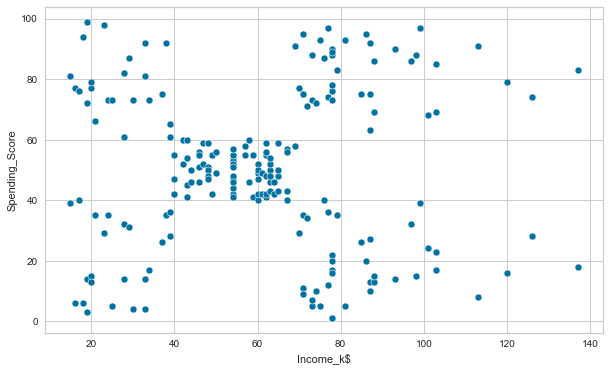

In [189]:
sns.scatterplot(x=X2["Income_k$"], y=X2["Spending_Score"]);

In [190]:
X2.head()

,Income_k$,Spending_Score,clusters
0,15,39,0
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,0


In [191]:
model = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [192]:
K = range(2,10)
for k in K:
    model2 = KMeans(n_clusters=k)
    model2.fit(X2)
    cluster_labels = model2.labels_
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2965115007362086
For n_clusters=3, the silhouette score is 0.467423497492382
For n_clusters=4, the silhouette score is 0.4928509467324051
For n_clusters=5, the silhouette score is 0.553745811377362
For n_clusters=6, the silhouette score is 0.53950978478089
For n_clusters=7, the silhouette score is 0.5317876847998328
For n_clusters=8, the silhouette score is 0.45761668054557786
For n_clusters=9, the silhouette score is 0.456004876430633


In [193]:
X2_clusters = model.labels_
X2["clusters"] = X2_clusters

#### Visualizing Cluster for Annual Income and Spending Score- x2

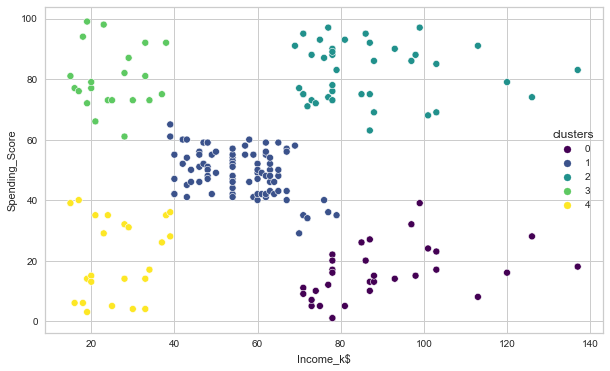

In [194]:
sns.scatterplot(x=X2["Income_k$"], y=X2["Spending_Score"], hue=X2.clusters, palette="viridis");


In [196]:
X2.clusters.value_counts()

1    85
2    39
0    32
4    23
3    21
Name: clusters, dtype: int64

## Conclusion

#### Interpretation based on Age and Spending Score- x1

- Scatter plot for Age and Spending Score
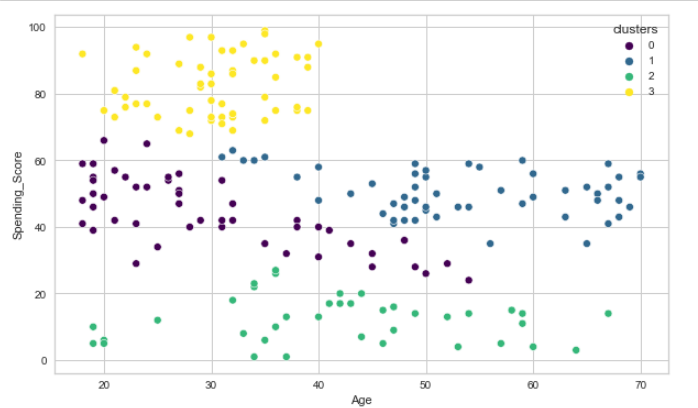

In [198]:
df_X1 = pd.concat([df, X1["clusters"]], axis=1)
df_X1

,Gender,Age,Income_k$,Spending_Score,clusters
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,0
197,Male,32,126,74,3
198,Male,32,137,18,2


In [199]:
df_X1.groupby("clusters").mean()

,Age,Income_k$,Spending_Score
clusters,,,
0,30.520000,55.760000,43.620000
1,53.169811,54.207547,50.452830
2,42.650000,67.125000,12.275000
3,30.175439,66.070175,82.350877


**cluster 0**: The average age is around 30. Both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1** : The average age is around 53. Both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 2**: The average age is around 42, the annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 3** :The average age is around 30. The annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    



#### Interpretation based on Annual Income and Spending Score- x2

- Scatter plot for Annual Income and Spending Score
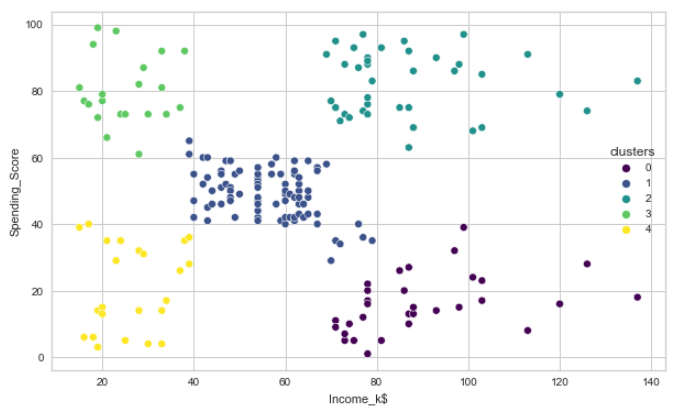

In [200]:
df_X2 = pd.concat([df, X2["clusters"]], axis=1)
df_X2

,Gender,Age,Income_k$,Spending_Score,clusters
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


In [205]:
df_X2.groupby(["Gender", "clusters"]).mean()

Age  Income_k$  Spending_Score
Gender clusters                                      
Female 0         43.785714  93.285714       20.642857
       1         40.509804  55.784314       48.647059
       2         32.190476  86.047619       81.666667
       3         25.583333  24.583333       81.833333
       4         43.214286  27.357143       21.714286
Male   0         38.833333  86.388889       11.666667
       1         45.441176  55.852941       49.852941
       2         33.277778  87.111111       82.666667
       3         25.000000  25.777778       77.666667
       4         48.333333  24.666667       19.666667

#### Female

**cluster 0**: The average age is around 43, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.  

**cluster 1** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 2**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.
  
**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 43. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.


#### Male

**cluster 0**: The average age is around 45, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group. 

**cluster 1** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 2**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.
   
**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.


**cluster 4** :The average age is around 45. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.


In [206]:
df_X2.groupby(["clusters"]).mean()

,Age,Income_k$,Spending_Score
clusters,,,
0,41.000000,89.406250,15.593750
1,42.482353,55.811765,49.129412
2,32.692308,86.538462,82.128205
3,25.333333,25.095238,80.047619
4,45.217391,26.304348,20.913043


#### For All Genders

**cluster 0**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

**cluster 1** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 2**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.





___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___